In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### Dataset Setup

1. mnist: Network Error로 인해 직접 다운로드가 불가능함 -> 수동으로 다운로드
- 'https://ossci-datasets.s3.amazonaws.com/mnist/train-images-idx3-ubyte.gz',
- 'https://ossci-datasets.s3.amazonaws.com/mnist/train-labels-idx1-ubyte.gz',
- 'https://ossci-datasets.s3.amazonaws.com/mnist/t10k-images-idx3-ubyte.gz', 
- 'https://ossci-datasets.s3.amazonaws.com/mnist/t10k-labels-idx1-ubyte.gz',

2. cifar: 자동으로 다운로드가 가능함

In [2]:
transform_mnist = transforms.Compose([transforms.ToTensor()])

mnist_train = torchvision.datasets.MNIST(root='./data', train=True, transform=transform_mnist, download=True)
mnist_test = torchvision.datasets.MNIST(root='./data', train=False, transform=transform_mnist, download=False)

mnist_train_loader = DataLoader(mnist_train, batch_size=64, shuffle=True)
mnist_test_loader = DataLoader(mnist_test, batch_size=64, shuffle=False)

In [3]:
print("shape :", mnist_train.data[0].shape)
mnist_train.data[0]

shape : torch.Size([28, 28])


tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [4]:
print("classes: ", mnist_train.classes)
mnist_train.train_labels[0]

classes:  ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


/opt/conda/envs/FGSM/lib/python3.11/site-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor(5)

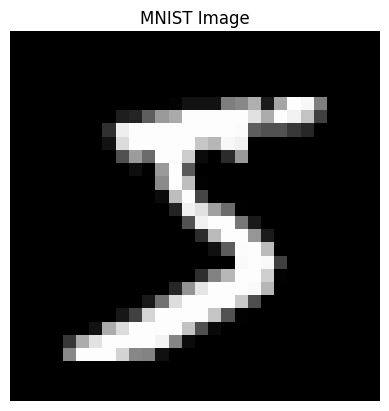

In [5]:
image = mnist_train.data[0]

plt.imshow(image, cmap='gray')
plt.title("MNIST Image")
plt.axis('off')
plt.show()

In [6]:
transform_cifar = transforms.Compose([transforms.ToTensor()])

cifar_train = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform_cifar, download=True)
cifar_test = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform_cifar, download=True)

cifar_train_loader = DataLoader(cifar_train, batch_size=64, shuffle=True)
cifar_test_loader = DataLoader(cifar_test, batch_size=64, shuffle=False)

In [7]:
print("shape :", cifar_train.data[0].shape)
cifar_train.data[0]

shape : (32, 32, 3)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
print("classes: ", cifar_train.classes)
print("Target: ", cifar_train.targets[0])
cifar_train.classes[cifar_train.targets[0]]

classes:  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Target:  6


'frog'

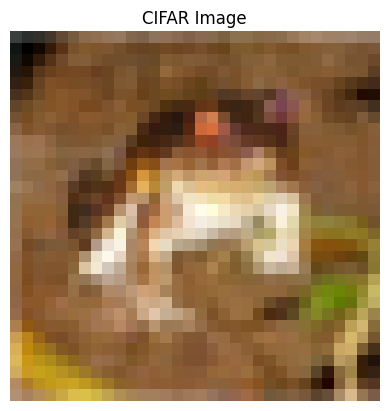

In [9]:
image = cifar_train.data[0]  # No reshaping needed if it's already in (32, 32, 3)

plt.imshow(image)
plt.title("CIFAR Image")
plt.axis('off')
plt.show()

### Model Definitions

In [10]:
class MNIST_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 128), nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        # x is of shape (batch_size, 1, 28, 28)
        return self.fc(self.conv(x))

class CIFAR_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 8 * 8, 128), nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        # x is of shape (batch_size, 3, 32, 32)
        return self.fc(self.conv(x))

### FGSM & PGD Attack Implementations

In [11]:
def fgsm_targeted(model, x, target, epsilon):
    '''
    FGSM targeted attack: 학습된 모델(CNN)을 사용하여 입력 이미지 x에 대한 gradient를 계산하고,
    해당 gradient를 사용하여 입력 이미지 x를 공격하여 target label로 분류되도록 변형하는 함수. ex) label이 0인 이미지에 대해서 1(Target)로 분류되도록 입력 이미지 x를 변형
    '''
    x.requires_grad = True # 입력 x에 대해 gradient를 계산(모델은 학습하지 않음)
    output = model(x)      # 예측 값
    loss = F.cross_entropy(output, target)  # classification: minimize target loss
    model.zero_grad() # Pytorch 0.4.1 이상에서는 model.zero_grad()를 사용하여 gradient 초기화: 모델 파라미터의 gradient도 자동으로 생성되고 누적됨
    loss.backward()   # 입력 이미지 x에 대한 gradient 계산
    x_grad = x.grad.data # x에 대한 gradient를 가져옴
    x_adv = x - epsilon * x_grad.sign()  # 입력 이미지 x에 대해서 target label로 분류되도록 변형. ex) target label로 예측한 경우, loss가 작고 입력 이미지가 적게 변형. 목
    return torch.clamp(x_adv, 0, 1)

def fgsm_untargeted(model, x, label, epsilon):
    '''
    FGSM untargeted attack: 학습된 모델(CNN)을 사용하여 입력 이미지 x에 대한 gradient를 계산하고,
    해당 gradient를 사용하여 입력 이미지 x를 공격하여 label로 분류되도록 변형하는 함수. ex) label이 0인 이미지에 대해서 0(label)이 아닌 경우로만 분류되도록 입력 이미지 x를 변형
    '''
    x.requires_grad = True # 입력 x에 대해 gradient를 계산
    output = model(x)
    loss = F.cross_entropy(output, label)
    model.zero_grad()
    loss.backward()
    x_grad = x.grad.data
    x_adv = x + epsilon * x_grad.sign() # 입력 이미지 x에 대해서 label로 분류되지않도록 변형. ex) label로 예측하지 않은 경우, loss가 크고 입력 이미지가 많이 변형. 
    return torch.clamp(x_adv, 0, 1) # clip to [0, 1]


def pgd_attack(model, x, label_or_target, k, eps, eps_step, targeted=False):
    x_adv = x + torch.empty_like(x).uniform_(-eps, eps) # Random initialization
    x_adv = torch.clamp(x_adv, 0, 1) # clip to [0, 1]

    for _ in range(k):
        x_adv = x_adv.clone().detach().requires_grad_(True)  # Fix: make x_adv a leaf variable with grad
        output = model(x_adv)
        loss = F.cross_entropy(output, label_or_target)
        model.zero_grad()
        loss.backward()
        grad = x_adv.grad.data

        if targeted:
            x_adv = x_adv - eps_step * grad.sign()
        else:
            x_adv = x_adv + eps_step * grad.sign()

        x_adv = torch.clamp(x_adv, 0, 1) # clip to [0, 1]
        x_adv = torch.clamp(x_adv, x - eps, x + eps).detach() # project back to the epsilon ball around x

    return x_adv

In [12]:
def train(model, loader, epochs=1):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    model.train()
    for epoch in tqdm(range(epochs), desc="training"):
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            output = model(x)
            loss = F.cross_entropy(output, y)
            loss.backward()
            optimizer.step()


def test(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in tqdm(loader, desc="testing"):
            x, y = x.to(device), y.to(device)
            output = model(x)
            pred = output.argmax(dim=1)
            correct += (pred == y).sum().item()
            total += y.size(0)
    return correct / total

testing: 100%|██████████| 157/157 [00:00<00:00, 180.96it/s]


Clean Accuracy: 0.9895
Targeted FGSM Accuracy: 0.19789999723434448
UnTargeted FGSM Accuracy: 0.012999999336898327
Targeted PGD Accuracy: 0.0030999998562037945
UnTargeted PGD Accuracy: 0.02070000022649765
Original Image:  7


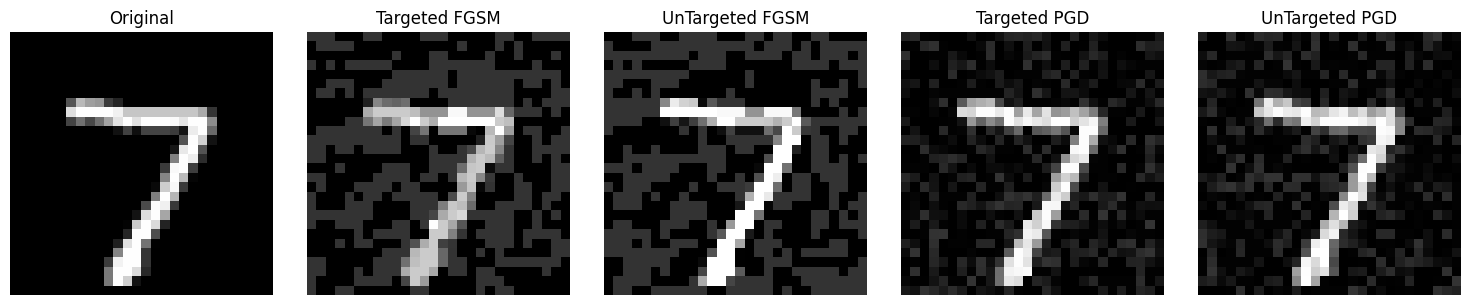

In [15]:
def generate_random_targets(y, num_classes=10):
    '''
    Generate random targets for targeted attacks.
    Args:
        y (torch.Tensor): Original labels.
        num_classes (int): Number of classes. -> if minist and cifar dataset, num classes is 10
    Returns:
        torch.Tensor: Random targets.
    '''
    target = torch.randint(0, num_classes, y.shape, device=y.device)
    mask = target == y
    target[mask] = (target[mask] + 1) % num_classes # Ensure target is different from original label
    return target

def visualize_images(images, titles, dataset='mnist'):
    '''
    Visualize a list of images with corresponding titles.
    Args:
        images (list of torch.Tensor): List of image tensors to visualize.
        titles (list of str): List of titles corresponding to each image.
        dataset (str): Dataset type ('mnist' or 'cifar').
    '''
    num_images = len(images)
    plt.figure(figsize=(3 * num_images, 3))
    
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, num_images, i + 1)
        plt.title(title)
        if dataset == 'mnist':
            plt.imshow(image.squeeze().detach().cpu().numpy(), cmap='gray')
        elif dataset == 'cifar':
            plt.imshow(image.permute(1, 2, 0).detach().cpu().numpy())
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def run_attacks(model, train_loader, test_loader, num_classes, params):
    model = model.to(device)
    train(model, train_loader, epochs=params.get('epochs', 1))

    clean_acc = test(model, test_loader)
    print(f"Clean Accuracy: {clean_acc:.4f}")

    epsilon = params.get('epsilon', 0.3)
    alpha = params.get('alpha', 0.01)
    steps = params.get('steps', 10)

    x_all, y_all = [], []
    for x, y in test_loader:
        x_all.append(x)
        y_all.append(y)
    x = torch.cat(x_all).to(device)
    y = torch.cat(y_all).to(device)
    target = generate_random_targets(y, num_classes)

    x_targeted_fgsm = fgsm_targeted(model, x, target, epsilon) # Targeted FGSM: target label로 분류되도록 변형된 입력 이미지
    x_untargeted_fgsm = fgsm_untargeted(model, x, y, epsilon)  # UnTargeted FGSM: label로 분류되지 않도록 변형된 입력 이미지
    x_targeted_pgd = pgd_attack(model, x, target, steps, epsilon, alpha, targeted=True) # Targeted PGD: target label로 분류되도록 변형된 입력 이미지
    x_untargeted_pgd = pgd_attack(model, x, y, steps, epsilon, alpha, targeted=False) # UnTargeted PGD: label로 분류되지 않도록 변형된 입력 이미지


    with torch.no_grad():
        print("Targeted FGSM Accuracy:", (model(x_targeted_fgsm).argmax(1) == target).float().mean().item()) # 변형된 이미지가 target label로 분류되는지 확인
        print("UnTargeted FGSM Accuracy:", (model(x_untargeted_fgsm).argmax(1) != y).float().mean().item())  # 변형된 이미지가 label로 분류되지 않는지 확인
        print("Targeted PGD Accuracy:", (model(x_targeted_pgd).argmax(1) == target).float().mean().item())   # 변형된 이미지가 target label로 분류되는지 확인
        print("UnTargeted PGD Accuracy:", (model(x_untargeted_pgd).argmax(1) != y).float().mean().item())    # 변형된 이미지가 label로 분류되지 않는지 확인
    

    # Visualize one of the original and adversarial examples
    idx = 0
    print("Original Image: ", y[idx].item())

    visualize_images(
        images=[
            x[idx], 
            x_targeted_fgsm[idx], 
            x_untargeted_fgsm[idx], 
            x_targeted_pgd[idx], 
            x_untargeted_pgd[idx]
        ],
        titles=[
            "Original", 
            "Targeted FGSM", 
            "UnTargeted FGSM", 
            "Targeted PGD", 
            "UnTargeted PGD"
        ],
        dataset='mnist' if x[idx].shape[0] == 1 else 'cifar'
    )
    
# Experment Results: MNIST DataSet의 경우 적은 모델 파라미터로도 공격에 대한 Robustness를 확인할 수 있다.
model = MNIST_CNN().to(device) # MNIST_CNN() or CIFAR_CNN()
train_loader = mnist_train_loader # mnist_train_loader or cifar_train_loader
test_loader = mnist_test_loader # mnist_test_loader or cifar_test_loader
num_classes = len(mnist_train.classes) # 10 for MNIST and CIFAR10
params = {
    'epochs': 20,
    'epsilon': 0.2,
    'alpha': 1e-3,
    'steps': 10,
}
run_attacks(model, train_loader, test_loader, num_classes, params)

testing: 100%|██████████| 157/157 [00:01<00:00, 146.09it/s]


Clean Accuracy: 0.6945
Targeted FGSM Accuracy: 0.6441999673843384
UnTargeted FGSM Accuracy: 0.446399986743927
Targeted PGD Accuracy: 0.5633999705314636
UnTargeted PGD Accuracy: 0.9540999531745911
Original Image:  3


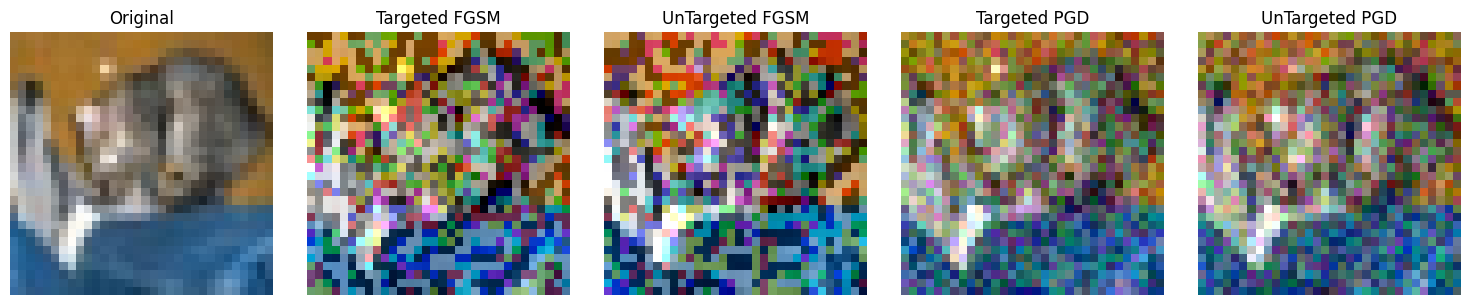

In [16]:
model = CIFAR_CNN().to(device) # MNIST_CNN() or CIFAR_CNN()
train_loader = cifar_train_loader
test_loader = cifar_test_loader
num_classes = len(cifar_train.classes) # 10 for MNIST and CIFAR10
params = {
    'epochs': 20,
    'epsilon': 0.2,
    'alpha': 1e-3,
    'steps': 10,
}
run_attacks(model, train_loader, test_loader, num_classes, params)

In [18]:
cifar_train.classes[3]

'cat'